<a href="https://colab.research.google.com/github/tkarani1/ml-hw1/blob/main/Copy_of_homework1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Homework 1: Supervised Learning 1: Lab Questions
### 25 points total
### Version 1.0



Aidan Aug (aaug1), Trisha Karani (tkarani1)

**Instructions:**
This notebook is intended to guide you through creating and exploring your dataset. Please answer all questions in this notebook (you will see <font color='blue'>TODO</font> annotations for where to include your answers). At the beginning of each part, we will bullet the expected deliverables for you to complete. All questions can be answered in 1-4 sentences, unless otherwise noted.

## Part 1: Defining the Problem and Choosing a Dataset
Things to do in this part:
1. Answer questions 1-4
2. Identify data sources to use in your dataset
3. List data sources used in question 5

Your first task is to choose a problem you're interested in. You are free to choose from any domain, but it should be within the **supervised learning** paradigm. In other words, a supervised classifier should be able to generalize from a training sample of $(X,y)$ pairs to predict outcomes on unseen data $x$. We want to use machine learning, so your problem should be difficult to solve using traditional programming algorithms. 

For simplicity, you will construct data for a binary or multiclass classification problem, where the possible labels are given by a fixed set of choices, or for a regression task (real-valued labels). Do not build a dataset for a structured prediction task.


#### 1) In one or two sentences, what are you interested in predicting given what data? This is your supervised learning problem.

You should answer this question before creating your dataset, as it will provide an indication of what to search for.

**Answer**

  The supervised learning problem we hope to solve is whether a patients' data relating to certain body measurements like body fat percentage and/or performance on physical fitness exams can predict their cardiovascular health/fitness.

#### 2) Is this a well-defined problem? Why or why not? What ambiguities (if any) exist in your problem?

Think about what challenges you solved by formulating the problem in this way.

**Answer**

  This is a well defined problem in that we are able to clearly describe the problem at hand, which can be whether an individual has poor or good cardiovascular fitness level. Additionally, cardiovascular health can be clearly defined as maximal oxygen consumption during a cardio-based task.
  
  Ambiguities may exist in that cardiovascular fitness level can be measured in various ways. Therefore, to accurately measure cardiovascular fitness, a standardized test must be used. Additionally, whether an individual's maximal oxygen consumption corresponds to "healthy" or "not healthy" can be subjective. This means that a standardized scale must also be used to define the problem.

#### 3) Does an easy (non-ML) solution exist for the problem? What are existing ways this problem, or a similar problem, is addressed (regardless of difficulty)?

**Answer**

  No simple non-ML solution exists for this problem, as the most straightforward solution for measuring cardiorespiratory fitness would be perform a standardized cardio-based exercise across many subjects. However, these exercises can often vary across experiments to measure cardiovascular fitness level, and would normally be completed in a controlled, lab-based environment. This would be relatively difficult, especially to complete by large across a large population.

#### 4) Why is using machine learning for this problem justified?

**Answer**

  Cardiorespiratory fitness is often used in predicting risk of cardiorespiratory disease in individuals, and also serves as a metric to determine overall physical activity ability. Ethicality in predicting an individual's cardiorespiratory fitness is therefore justified from a medical perspective, and a daily-task perspective. 

  Furthermore, as there is a clearly defined problem statement, burdonsome current solution, vast amounts of data, and simple method of evaluating our features via linear regression, using machine learning for this problem is justified.

Now, we'll turn to data we can use to actually solve your problem. You may wish to use Section 3.1 of the assignment sheet for inspiration. **Remember, you are expected to *create* a dataset, not use an existing one**.

#### 5) List the sources for all data you used when creating your dataset along with (very briefly) what you obtained from it.

For example: <br /> Obtained features a,b,c from http://www.domain1.com/example_data. <br /> Obtained labels from http://www.domain2.com/example_labels.

**Answer**

Obtained features a,b,c from :
https://wwwn.cdc.gov/Nchs/Nhanes/Search/NnyfsData.aspx?Component=Examination&CycleBeginYear=2012. This hyperlink leads to a webpage with various datasets from the National Health and Nutrition Examination Survey. On this webpage, we used the following datasets:

1. Feature a (Average Lower Body Strength) obtained from https://wwwn.cdc.gov/Nchs/Nnyfs/Y_LMX.XPT

2. Feature b (Sleep-Awake Ratio) obtained from https://wwwn.cdc.gov/Nchs/Nnyfs/Y_PAXDAY.htm

3. Feature c (Normalized Skinfold) obtained from https://wwwn.cdc.gov/Nchs/Nnyfs/Y_BMX.XPT

Obtained Labels for each instance from the same website(https://wwwn.cdc.gov/Nchs/Nhanes/Search/NnyfsData.aspx?Component=Examination&CycleBeginYear=2012). 

1. Link to the actual dataset is: https://wwwn.cdc.gov/Nchs/Nnyfs/Y_CVX.XPT

## Part 2: What does the data look like?
Things to do in this part:
1. Answer questions 6-11
2. Print a few examples of raw data (if possible) otherwise explain what the raw data looks like.
3. Create at least 3 numerical features from your raw data
4. Create dataset such that $X\in\mathbb{R}^{m\times n}$ and $y\in\mathbb{R}^m$ are both numpy arrays
5. Create 1 visual that helps you understand your data.

Let's take a look at the various data you've collected. First let's read in the raw data. You may read the data into whatever is most convenient (e.g. a list, a numpy array, a Pandas dataframe, etc.). **At this point your data will be in whatever format you downloaded them in**. For example, if you're working with text data, your data might be strings of words or collection of text documents. If you are working with image data, you might have a collection of images.
<br /><br />
For those of you new to working with data in Python, we have included examples of how to import the raw data. These are merely suggestions if they work for you. You don't have to use them.

In [32]:
# # Suppose you have a directory called documents that contains Wikipedia articles, you can process these as follows:
# # Cleaning the data (e.g. removing stop words) is not required.
# import os
# from collections import defaultdict

# files = [f for f in os.listdir('documents') if os.path.isfile(os.path.join('documents', f))
# X = defaultdict(list)
# for i, file in enumerate(files[:len(files)], start=1):
#     with open(os.path.join('documents', file)) as f:
#         X['doc_' + str(i)] = f.readlines()
# # X is a dictinary that maps doc_id to text.

# # Suppose you have labels that are stored in a CSV file:
# import pandas as pd

# y = pd.read_csv('labels.csv')
# # y is a Pandas dataframe that contains each label.

# # Suppose you have a directory called images that contains pictures of cats, you can process them as follows:
# from PIL import Image

# images = [f for f in os.listdir('images') if os.path.isfile(os.path.join('images', f))
# X = [Image.open(image) for image in images]
# # X is a list of PIL Image objects

#######################################################
# TODO: Read in your raw data
import pandas as pd
import os

# Our data is stored in SAS files in Github. 
# We simply have to use the raw file link and import it directly
if (os.path.isdir('ml-hw1') == False):
  !git clone https://github.com/tkarani1/ml-hw1.git

# First, read in the raw data
body_data = pd.read_sas("/content/ml-hw1/Y_BMX.XPT")
plank_data = pd.read_sas("/content/ml-hw1/Y_PLX.XPT")
cardio_data = pd.read_sas("/content/ml-hw1/Y_CVX.XPT")
cardio_end_data = pd.read_sas("/content/ml-hw1/Y_CEX.XPT")
pullup_data = pd.read_sas("/content/ml-hw1/Y_MPX.XPT")
lowerbody_data = pd.read_sas("/content/ml-hw1/Y_LMX.XPT")
physact_data = pd.read_sas("/content/ml-hw1/Y_PAXDAY.XPT")

# Next, process the data to create a table of (raw) features
leg_force = lowerbody_data.filter(['SEQN','LBLEXT1', 'LBLEXT2', 'LBLEXT3', 'LBREXT1', 'LBREXT2', 'LBREXT3'], axis=1)
cardio_level = cardio_data.filter(['SEQN','CVDFITL2'], axis=1)
sleep_awake = physact_data.filter(['SEQN','PAXSWMD', 'PAXWWMD'], axis=1)
skinfold = body_data.filter(['SEQN', 'BMXCALFF', 'BMXSUB', 'BMXTRI'], axis=1)

# todo: delete the following b/c unused
#max_pullups = lowerbody_data.filter(['SEQN','MPXPULL'], axis=1)
#max_plank = plank_data.filter(['SEQN','MPXPLANK'], axis=1)
#bmi = body_data.filter(['SEQN','BMXBMI'], axis=1)

X = pd.concat([leg_force, sleep_awake, skinfold], axis = 1)
y = cardio_level

#######################################################

/usr/local/lib/python3.7/dist-packages/pandas/io/sas/sas_xport.py:475: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  df[x] = v


Now, let's print a few examples. Depending on your data format, you may have to 
write this yourself. We have provided some examples below.

In [33]:
# # If your data is stored in an array:
# print('X:', X[:5])
# print('y:', y[:5])

# # If your data consists of image files:
# from PIL import Image

# for i in range(5):
#     print('image:')
#     img = X[i]
#     img.show()
#     print('label:', y[i])

#######################################################
# TODO: print out what a few examples of your raw data.

print(X.head())
print(y.head())
#######################################################

      SEQN  LBLEXT1  LBLEXT2  LBLEXT3  ...     SEQN  BMXCALFF  BMXSUB  BMXTRI
0  71917.0      NaN      NaN      NaN  ...  71917.0       NaN     NaN     NaN
1  71918.0     61.9     60.5     64.8  ...  71918.0      22.0    17.4    19.9
2  71919.0     65.8     68.1     74.8  ...  71919.0      18.4     9.8    15.0
3  71920.0     83.2    108.9    103.2  ...  71920.0       NaN    22.8    20.6
4  71922.0    102.6    108.6    105.5  ...  71921.0       8.4     5.7     8.6

[5 rows x 14 columns]
      SEQN  CVDFITL2
0  71917.0       NaN
1  71919.0       1.0
2  71920.0       3.0
3  71922.0       3.0
4  71923.0       1.0


#### (Optional) If your raw data format can't be displayed in a Jupyter notebook (e.g. video or audio files), you may skip the above step. You should still look at the raw data in whatever way possibly, but instead just describe what the raw data is that you look at.

<font color='blue'>
    TODO: replace this cell with your answer. Leave blank if not applicable.
</font>

#### 6) What information is contained in each example (row) in $X$? These are your raw data features.

<font color='blue'>
    TODO: replace this cell with your answer
</font>

If your data is not numerical, this will be difficult for an algorithm to learn directly. So, now that you've seen what the raw data looks like, you will start extracting *numerical* features from the raw data.
<br /><br />
We obtain features through a process called **feature engineering**. Features may be derived from the existing raw data or may come from other data sources that can be associated with each example. This is a challenging task that often requires domain knowledge about the problem you are trying to solve. 
<br /><br />
While very important in dataset creation, feature engineering is not the focus of this assignment. You will need some features for the other steps, but these can be very simple and don't need to rely on domain knowledge.
<br /><br />
**You will need to add at least 3 features to your dataset**. If your data is Wikipedia documents, possible features could be number of sentences, word count, the words that appear in the article, number of document revisions, number of contributing authors, number of references, etc. Notice that some of these features could be derived from the raw data (i.e. the words) while others may need to be downloaded separately (i.e. page metadata). If your data are cat images, your features could be focus measure (i.e. blurriness/sharpness) using OpenCV Variance of Laplacian, whether image is grayscale, number of pixels, the pixel color values, etc.
<br /><br />
You are free to obtain features in any way you like as long as you can justify why the features your propose should help solve the problem you've defined.
<br /><br />
We'll provide some examples of what we're looking for. We are not expecting anything fancy for this step.

In [36]:
# # If you're using text data stored in a dictionary (like example above):
# # Suppose each document is a string that contains a period
# # and are trying to predict end of sentences (EOS),
# import re
# import pandas as pd
# from collections import defaultdict

# # Convert X from doc_id -> text to doc_id -> {sentence, features}
# X = {k:{'sentence': v, 'features': None} for k,v in X.items()}

# # suppose you downloaded these external data: common abbreviations, titles (e.g. mr, ms, dr), month abbreviations (e.g. sept, oct)
# abbrevs = pd.read_csv('common_abbrevs.csv')
# titles = pd.read_csv('titles.csv')
# months = pd.read_csv('month_abbrevs.csv')

# # for the purpose of this example, assume all documents have len > 3
# features = defaultdict(int)
# for doc_id, doc in X.items():
#     idx = re.find('.')
#     one_before = doc['sentence'][idx - 1] if idx > 0 else None
#     one_after = doc['sentence'][idx + 1] if idx < len(doc['sentence']) - 1 else None
#     features['is_abbrev'] = 1 if one_before and one_before in abbrevs else 0
#     features['is_title'] = 1 if one_before and one_before in titles else 0
#     features['is_month'] = 1 if one_before and one_before in months else 0
#     features['is_decimal'] = 1 if one_before and one_after in one_before.isdigit() and one_after.isdigit() else 0
#     features['other_punc'] = 1 if any((p in '?!.') for c in doc['sentence'][idx:]) else 0
#     features['period_loc'] = idx
#     X[doc_id]['features'] = features
# # In just a few lines of Python, we created 6 features!

#######################################################
# TODO: compute features for each example

# Create a feature relating to total lower-body strength
leg_force = leg_force.dropna()
leg_force['AVG_LEG_FORCE'] = (leg_force['LBLEXT1'] + leg_force['LBLEXT2'] + leg_force['LBLEXT3'] + leg_force['LBREXT1'] + leg_force['LBREXT2'] + leg_force['LBREXT3'])/6 #find mean leg force from 3 tests on left and right legs
leg_force['AVG_LEG_FORCE_NORM'] = leg_force['AVG_LEG_FORCE'] / (leg_force['AVG_LEG_FORCE']).max()
leg_force_feat = leg_force.filter(['SEQN','AVG_LEG_FORCE_NORM'], axis=1)

# Create a feature relating sleep to awake time
sleep_awake = sleep_awake.dropna()
sleep_awake = sleep_awake[sleep_awake['PAXSWMD'] >= 120]
sleep_awake = sleep_awake[sleep_awake['PAXWWMD'] >= 120]
sleep_awake = sleep_awake.groupby(['SEQN']).mean()
sleep_awake['SLP_AWK_RATIO'] = sleep_awake['PAXSWMD'] / sleep_awake['PAXWWMD']
sleep_awake_feat = sleep_awake.filter(['SEQN','SLP_AWK_RATIO'], axis=1)
sleep_awake_feat

# Create a feature relating to total subcutaneous body fat
skinfold = skinfold.dropna()
skinfold['SKINFOLD_SUM'] = skinfold['BMXCALFF'] + skinfold['BMXSUB'] + skinfold['BMXTRI']
skinfold['SKINFOLD_SUM_NORM'] = skinfold['SKINFOLD_SUM'] / (skinfold['SKINFOLD_SUM']).max()
skinfold_feat = skinfold.filter(['SEQN','SKINFOLD_SUM_NORM'], axis=1)

# Process the label to be a binary label
cardio_level = cardio_level.dropna()
cardio_level.loc[cardio_level['CVDFITL2'] == 1, 'CVDFITL2'] = 0
cardio_level.loc[cardio_level['CVDFITL2'] == 2, 'CVDFITL2'] = 0
cardio_level.loc[cardio_level['CVDFITL2'] == 3, 'CVDFITL2'] = 1
cardio_level.loc[cardio_level['CVDFITL2'] == 4, 'CVDFITL2'] = 1
cardio_level_processed = cardio_level.copy();
cardio_level_processed = cardio_level.rename(columns={'CVDFITL2' : 'CARDIO_LEVEL'})

# Create a dataframe with all features and labels corresponding to each individual participant
leg_force_sleep_awake = pd.merge(leg_force_feat, sleep_awake_feat, on='SEQN', how='inner')
skinfold_cardio_level = pd.merge(skinfold_feat, cardio_level_processed, on='SEQN', how='inner')
features_labels = pd.merge(leg_force_sleep_awake, skinfold_cardio_level, on='SEQN', how='inner')
features_labels = features_labels.dropna()

X_processed = features_labels.filter(['AVG_LEG_FORCE_NORM','SLP_AWK_RATIO', 'SKINFOLD_SUM_NORM'], axis=1)
y_processed = features_labels.filter(['CARDIO_LEVEL'])
#######################################################

#### 7) Describe the features in your dataset.

**Answer**

The engineered features we added to our dataset were average leg force generated across 3 experiments and both legs, the ratio of sleep time to awake time, and an averaged amount of skinfold.

1. Average leg force Generated: The original data we took from NNYFS dataset on lower body strength included three experiments measuring left leg extension muscle strength, and three experiments measuring the right. We averaged across all these features to generate a feature measuring total lower body strength and then normalized the values. 

2. Ratio of Sleep to Awake Time: The original data we took from the NNYFS website had a physical activity monitor (PAM) dataset, where participants wore a PAM accelerometer device to measure total physical activity. One of the features measured total awake time, and another sleep time. However, much of the data was lost as it was either missing or did not directly correspond to either state. By comparing these two values, we were able to determine a ratio for total sleep to total awake time.

3. Average amount of Skinfold: The original data on body measurements had 3 features measuring amount of skinfold on each participant. As skinfold directly relates to subcutaneous body fat, we summed and normalized these values to determine a proxy for total amount of body fat in each participant.

Next, let's focus on what you're trying to predict. First, let's see what the potential outcomes look like.

In [ ]:
import numpy as np

np.unique(y)

array([0., 1.])

#### 8) Is your dataset suitable for a regression or classification task? Explain.

**Answer**

This dataset is suitible for a classification task. The outcome predicted is not continuous, and instead simply tries to predict the correct label (fit or unfit in terms of cardiorespiratory health). Whether or not they are "close" to fitness or not does not matter. Instead, only classification matters to relate whether the invidiual should or should not seek additional aid to improve their cardiorespiratory health.

Now, we'll standardize our data as follows. The data matrix $X$ should be a numpy 2d array in $\mathbb{R}^{m\times n}$. The labels should be a numpy 1d array in $\mathbb{R}^m$. $m$ is the number of examples and $n$ is the number of features. **You will be training your supervised classifer on the features, which might not include all (or any) of the raw data**. This is a decision you will make when creating your dataset.
<br /><br />
Note: this is the format we're looking for your data to be in when you submit your dataset (i.e. $X\in\mathbb{R}^{m\times n}$ and $y\in\mathbb{R}^m$ and are both numpy arrays).

In [ ]:
# # Now, using your numerical features from the previous step, you can construct the dataset.
# # Depending on what your raw data was (i.e. if any field was numerical), you may include this in the final dataset
# # or you may just use the features you created. 

# # Using the dictionary from above (doc_id -> {sentence, features}) the dataset can be constructed
# import numpy as np

# X = np.array([np.array(doc.features.values()) for doc in X.values()])
# y = np.array(y) # assume y was a list of binary labels previously

#######################################################
# TODO: Convert X and y to numpy arrays with appropriate dimensions
import numpy as np
X = X.to_numpy()
y = np.array(y)

#######################################################

If you have a classification dataset, let's look at class balance. This tells us how many examples we have for each label.

In [ ]:
for i in np.unique(y):
    print(f'{len(y[y==i])} examples of class {i}')

204 examples of class 0.0
134 examples of class 1.0


#### 9) Classification: Is your dataset balanced or imbalanced?


Regression: How are your labels distributed? Normal distrbution? Uniform within a range? etc.

The dataset is imbalanced, as there are an unequal number of examples where participants were unfit (204) compared to those who were fit (134). This comes to be a ratio of 102:67, with 60% total participants labeled as unfit and 40% total participants labeled as fit.

Let's compute some statistics for the dataset.

In [ ]:
#######################################################
print(f'Number of examples: {X.shape[0]}')
print(f'Number of features per example: {X.shape[1]}')
# there are many more that are relevant to the specific domain your data is in.
# TODO: if applicable, please include any additional dataset statistics here
#######################################################

Number of examples: 338
Number of features per example: 3


#### 10) Do you have lots of high quality data? Explain limitations (if any) that exist in terms of data quantity and quality.

**Answer**

The primary limitation of this data is quantity: there are only several hundred, specifically 338, instances we can train (and test) on. This is because the data we are using is taken from physical examinations of participants, which is often only performed in a controlled/at-home environment. Based on ethical concerns and population limitations, this makes the data pool rather small.

Another limitation is that many participants had NaN values for certain physical measurements, and some participants did not complete the entirety of the physical examinations. We had to remove the instances for which data was missing, which also lead to a loss in quantity.

In terms of the actual quantity of the data, the majority of the features from the NNYFS datasets were measured in a controlled environment. This standardization of physical examination procedures ensured higher quality of the data. One exception is the sleep-awake time data, where participants wore a physical activity monitor in an at-home setting. This lead to both loss of data, and non-standardized measurements that could affect the calculated sleep-awake time features.

Data visualizations help us understand our data and draw insights. Just like there is no single ML algorithm that applies to every problem, there isn't a visualization that works for every dataset.
<br /> <br />
Instead, you will produce some visuals that you think tell an interesting story about your data. We will provide some suggestions, which you can use for inspiration. 
<br /> <br />

Types of information you may wish to capture (this is by no means comprehensive):
*   Missingness of data (consider using heat maps, scatter plots)
*   Correlation of features (consider using a correlation matrix)
*   Distribution of data (consider using historgrams, violin plots)
*   Linear separability, if you have binary classification
<br /> <br />

Check out these visualization galleries for further inspiration and example code:
*   [Seaborn](https://seaborn.pydata.org/examples/index.html)
*   [Plotly](https://plotly.com/python/)
*   [Python Graph Gallery](https://python-graph-gallery.com/)

You should create **at least 1 visualization** for your dataset and explain what you learned about your data from it. Below is an example heatmap showing correlation of features from the sklearn iris dataset.

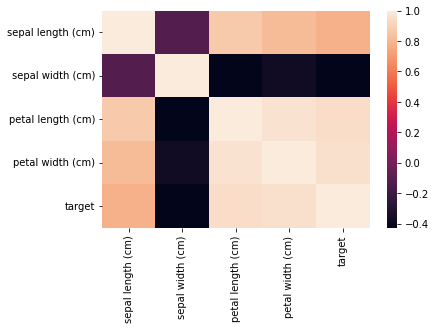

In [ ]:
from sklearn import datasets
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

iris = datasets.load_iris()
df = pd.DataFrame(data= np.c_[iris['data'], iris['target']],
                     columns= iris['feature_names'] + ['target'])
sns.heatmap(df.corr(), 
            xticklabels=df.corr().columns.values,
            yticklabels=df.corr().columns.values)
plt.show()

In [ ]:
#######################################################
# TODO: Visualize the dataset

#######################################################

#### 11) What insights do you gain from this visualization about your dataset?

<font color='blue'>
    TODO: replace this cell with your answer
</font>

## Part 3: Using your dataset

Things to do in this part:
1. Answer questions 12-13
2. Perform a train-test split
3. Train simple supervised learning algorithm on dataset

Now that you have created your dataset and explored some of its properties, you will use a supervised classifier to predict the outcome you definined in the problem statement. To evaluate how well this classifier predicts the outcomes, you will need to set some data aside for testing. First, you'll use sklearn to split the data into train and test sets, with 25% of the data reserved for testing.

In [ ]:
from sklearn.model_selection import train_test_split 

# Train Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)
print(f'Training examples: {X_train.shape[0]}\nTesting examples{ {X_test.shape[0]}}')

Training examples: 253
Testing examples{85}


Now, we'll save your train and test sets. Together, these four files will make up the dataset you submit on Gradescope. 

In [ ]:
import numpy as np 

np.savetxt("X_train.csv", X_train, delimiter=",")
np.savetxt("X_test.csv", X_test, delimiter=",")
np.savetxt("y_train.csv", y_train, delimiter=",")
np.savetxt("y_test.csv", y_test, delimiter=",")

# zip together all components of your dataset
!zip homework1_dataset.zip X_train.csv X_test.csv y_train.csv y_test.csv

Now, let's train some classifiers or regression models. You are encouraged to try out multiple different algorithms, but only one is required. You are also encouraged to use popular packages such as [sklearn](https://scikit-learn.org/stable/modules/classes.html#module-sklearn.linear_model); you are not expected to implement any of these algorithms yourself. We have included sklearn's Logistic Regression and Linear Regression algorithms below as examples.
<br /><br />
Consider trying the following algorithms:
<br />
Classification: SVM, Decision Tree, Random Forest
<br />
Regression: Lasso, ridge regression

In [ ]:
# # If you have a classification problem, here is how to train a Logistic Regression classifier

# from sklearn.linear_model import LogisticRegression

# clf = LogisticRegression(random_state=0).fit(X_train, y_train)
# y_hat = clf.predict(X_test)
# accuracy = clf.score(X_test, y_test)
# print(f'model accuracy is {accuracy}')

# # If you have a regression problem, here is how to train a Linear Regression classifier

# from sklearn.linear_model import LinearRegression

# reg = LinearRegression().fit(X_train, y_train)
# y_hat = reg.predict(X_test)
# r_squared = reg.score(X_test, y_test)
# print(f'Goodness of fit given by coefficient of determination is {r_squared}')

#######################################################
# TODO: Train at least one simple supervised learning algorithm on your dataset

#######################################################

In [ ]:
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression(random_state=0).fit(X_train, y_train)
y_hat = clf.predict(X_test)
accuracy = clf.score(X_test, y_test)
print(f'model accuracy is {accuracy}')


model accuracy is 0.6352941176470588


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
#SVM
from sklearn.svm import LinearSVC
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_classification
clf = make_pipeline(StandardScaler(),LinearSVC(random_state=0, tol=1e-5, max_iter=10000))
clf.fit(X_train, y_train)
y_hat = clf.predict(X_test)
accuracy = clf.score(X_test, y_test)
print(f'model accuracy is {accuracy}')

model accuracy is 0.6470588235294118


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
#Decision Tree
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(random_state=0)
clf.fit(X_train, y_train)
y_hat = clf.predict(X_test)
accuracy = clf.score(X_test, y_test)
print(f'model accuracy is {accuracy}')

model accuracy is 0.6


In [ ]:
#Random Forest
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
clf = RandomForestClassifier(random_state=0)
clf.fit(X_train, y_train)
y_hat = clf.predict(X_test)
accuracy = clf.score(X_test, y_test)
print(f'model accuracy is {accuracy}')

model accuracy is 0.611764705882353


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """


#### 12) How can you meaningfully evaluate results?  How was the performance of your model: did it meee?
*Note:* if you trained more than one model above, you only need to answer this question for one of them.

<font color='blue'>
    TODO: replace this cell with your answer
</font>

#### 13) In creating your dataset, what discussions did you have about the ethical implications of what you were collecting? Are there any potential issues with fairness?

<font color='blue'>
    TODO: replace this cell with your answer
</font>

## Submit
Great work! You're all done.

Make sure to submit this Python notebook (as a PDF) and the dataset you created as a zip file. See the homework writeup for directions.